# --- Case study 2:- welcome, first off, I imported the necessary libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Step 1: Load user data file that was provided in the google drive after which EDA will begin

In [2]:
users_data = pd.read_csv('users_data.csv') 

# Step 2: Exploratory Data Analysis (EDA) for Users Data, **EDA in clustering is done to understand the data's structure, detect patterns, and identify issues like missing values or outliers that could impact the clustering results.**

In [3]:
def perform_users_eda(data):
    print("\nSummary Statistics:\n", data.describe())
    print("\nMissing Values:\n", data.isnull().sum())
    print("\nData Types:\n", data.dtypes)
    
print("--- Users Data EDA ---")
perform_users_eda(users_data)

--- Users Data EDA ---

Summary Statistics:
              user_id   loan_score  device_rating  data_quality     ltv_rate  \
count    1599.000000  1599.000000    1599.000000   1599.000000  1599.000000   
mean   397669.085679     8.319637       0.527821      0.270976     2.538806   
std    228348.459331     1.741096       0.179060      0.194801     1.409928   
min      1449.000000     4.600000       0.120000      0.000000     0.900000   
25%    196569.500000     7.100000       0.390000      0.090000     1.900000   
50%    398366.000000     7.900000       0.520000      0.260000     2.200000   
75%    592184.000000     9.200000       0.640000      0.420000     2.600000   
max    798882.000000    15.900000       1.580000      1.000000    15.500000   

       bureau_score  total_tenure  months_active  savings_score     tx_score  \
count   1599.000000   1599.000000    1599.000000    1599.000000  1599.000000   
mean       0.087467     15.874922      46.467792       0.996747     3.311113   
std

# Step 3: Preprocessing Users Data for Clustering, Preprocessing ensures the data is clean, standardized, and ready for clustering by addressing missing values, scaling features, and selecting relevant variables to improve clustering accuracy.

please note that the users data does not have any missing data only the cluster column that was left empty .

In [6]:
def preprocess_clustering_data(data):
    # Select numerical columns for clustering
    numerical_cols = [
        'loan_score', 'device_rating', 'data_quality', 'ltv_rate', 'bureau_score', 'total_tenure', 
        'months_active', 'savings_score', 'tx_score', 'usage_score', 'airtime_score'
    ]

    # Fill missing values with the median
    data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

    # Standardize numerical features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[numerical_cols])
    return scaled_data

scaled_users_data = preprocess_clustering_data(users_data)

# Step 4: Determine Optimal Clusters, finding the optimal number of clusters helps group the data in a way that makes the clusters meaningful and useful, without making them too broad or too detailed.

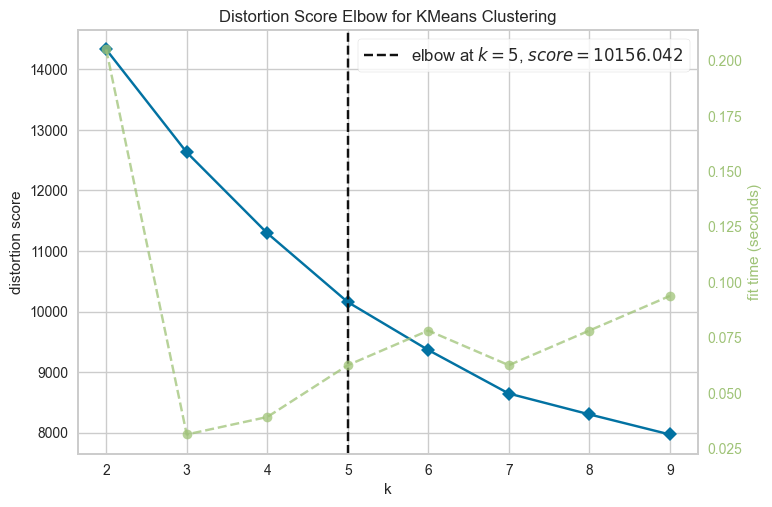

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
model = KMeans(random_state=42)
elbow_visualizer = KElbowVisualizer(model, k=(2, 10))
elbow_visualizer.fit(scaled_users_data)
elbow_visualizer.show()

# Step 5: Apply Clustering: Applying clustering groups similar data points together, creating clusters that help us identify patterns and profiles in the data.

In [8]:
optimal_k = elbow_visualizer.elbow_value_
model = KMeans(n_clusters=4, random_state=42)
clusters = model.fit_predict(scaled_users_data)
users_data['cluster'] = clusters

# Step 6: Visualize Clusters with PCA : Visualizing clusters with PCA reduces the data to two dimensions, making it easier to see how the clusters are separated and understand their patterns.

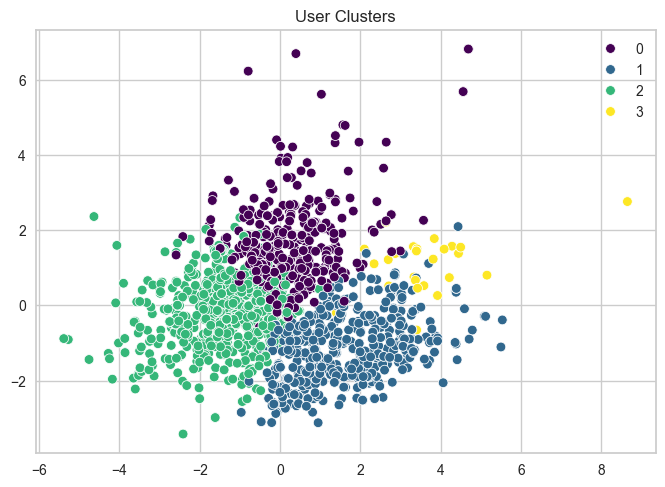

In [11]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_users_data)
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=clusters, palette='viridis')
plt.title("User Clusters")
plt.show()

# Step 7: Summarize and Label Clusters, this helps in interpreting the characteristics of each group, making it easier to understand their behavior and assign meaningful descriptions.

In [12]:
def label_clusters(data):
    summaries = data.groupby('cluster').mean()
    cluster_labels = {
        0: "Moderate Loan Scores, Medium Activity",
        1: "Stable High-Score Long-Tenure",
        2: "High Loan Scores, Short Activity",
        3: "Experienced Long-Term High Engagement",
        4: "Lower Scores, Average Engagement"
    }
    summaries['cluster Label'] = summaries.index.map(cluster_labels)
    return summaries

cluster_summary = label_clusters(users_data)
print("\n--- Labeled Cluster Summary ---\n")
print(cluster_summary)

# Save the updated users_data with clusters to a CSV file
output_file = 'updated_users_data.csv'
users_data.to_csv(output_file, index=False)
print(f"Updated dataset with clusters saved to {output_file}")


--- Labeled Cluster Summary ---

               user_id  loan_score  device_rating  data_quality  ltv_rate  \
cluster                                                                     
0        407533.591029    8.163061       0.533588      0.290607  3.097230   
1        407652.020921   10.119665       0.394498      0.469226  2.610356   
2        388610.921459    7.190603       0.614173      0.118612  2.216900   
3        326909.793103    8.455172       0.526897      0.492759  1.975862   

         bureau_score  total_tenure  months_active  savings_score  tx_score  \
cluster                                                                       
0            0.086644     27.183377      89.353562       0.997270  3.286544   
1            0.084366     10.648536      28.847280       0.997545  3.206025   
2            0.079086     13.396213      34.767181       0.995920  3.405428   
3            0.355379     15.172414      64.103448       0.997077  3.045517   

         usage_score  airtim

# Step 8: Evaluate Clustering Performance
# The Silhouette Score measures how well data points fit within their clusters, indicating how distinct and well-separated the clusters are

In [13]:

from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette_avg = silhouette_score(scaled_users_data, clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Davies-Bouldin Index
db_score = davies_bouldin_score(scaled_users_data, clusters)
print(f"Davies-Bouldin Index: {db_score:.2f}")

# Inertia (Within-Cluster Sum of Squares)
print(f"Inertia (Within-Cluster Sum of Squares): {model.inertia_:.2f}")

Silhouette Score: 0.21
Davies-Bouldin Index: 1.51
Inertia (Within-Cluster Sum of Squares): 11294.89


In [ ]:
Thank you, bye. 